Some of this initial exploration was started by 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Start by examining datasets and understanding how the data is split up between the three datasets provided.

In [4]:
tile_meta = pd.read_csv("vasculature_data\\tile_meta.csv")
tile_meta.head(10)

,id,source_wsi,dataset,i,j
0,0006ff2aa7cd,2,2,16896,16420
1,000e79e206b7,6,3,10240,29184
2,00168d1b7522,2,2,14848,14884
3,00176a88fdb0,7,3,14848,25088
4,0033bbc76b6b,1,1,10240,43008
5,003504460b3a,3,2,8192,11776
6,00359ab8338b,8,3,6656,9216
7,00488ca285ee,9,3,8192,37888
8,004daf1cbe75,3,2,6144,11264
9,004fb033dd09,7,3,20480,31232


In [5]:
tile_meta_dataset = {dataset: info for dataset, info in tile_meta.groupby('dataset')}
tile_meta_dataset

{1:                 id  source_wsi  dataset      i      j
 4     0033bbc76b6b           1        1  10240  43008
 16    00656c6f2690           1        1  10240  46080
 17    0067d5ad2250           2        1  23552  22528
 33    00d75ad65de3           1        1   8192  39424
 34    00da70813521           1        1  10240  46592
 ...            ...         ...      ...    ...    ...
 6844  f86347534ec1           2        1  16896  20992
 6895  faba1bf818ae           1        1   3072  39424
 6933  fc6def641612           1        1   7680  40960
 6951  fd2437954fd8           1        1   5120  39424
 6990  fe248458ea89           1        1  10240  44032
 
 [422 rows x 5 columns],
 2:                 id  source_wsi  dataset      i      j
 0     0006ff2aa7cd           2        2  16896  16420
 2     00168d1b7522           2        2  14848  14884
 5     003504460b3a           3        2   8192  11776
 8     004daf1cbe75           3        2   6144  11264
 11    005715f0a313           3 

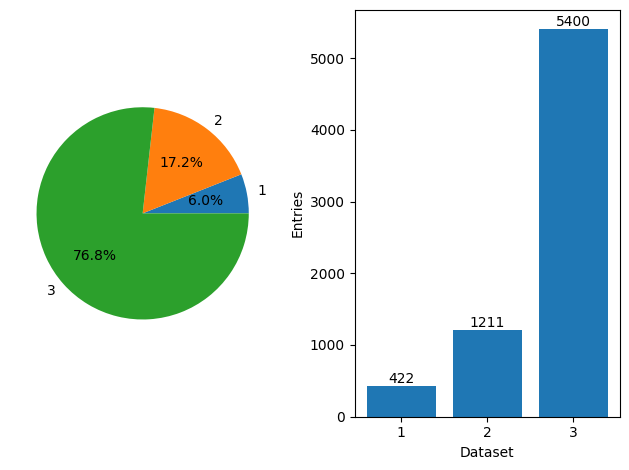

In [6]:
x = [(i[0]) for i in tile_meta_dataset.items()]
y = [len(i[1]) for i in tile_meta_dataset.items()]

fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2)
barchart = ax1.bar(x, height=y)
ax1.set_xlabel('Dataset')
ax1.set_ylabel('Entries')
ax1.set_xticks(range(1,4))
ax1.bar_label(barchart)

piechart = ax.pie(y, labels=x, autopct='%1.1f%%')
fig.tight_layout()
plt.show()

There are 7033 data points.
Dataset 1 (expert annotations): 422
Dataset 2 (annotated but not expert confirmed): 1211
Dataset 3 (unannotated): 5400

In [7]:
# Separate the dataset which contain expert annotations only
tile_meta_datasetOne = tile_meta_dataset[1]
tile_meta_datasetOne


,id,source_wsi,dataset,i,j
4,0033bbc76b6b,1,1,10240,43008
16,00656c6f2690,1,1,10240,46080
17,0067d5ad2250,2,1,23552,22528
33,00d75ad65de3,1,1,8192,39424
34,00da70813521,1,1,10240,46592
...,...,...,...,...,...
6844,f86347534ec1,2,1,16896,20992
6895,faba1bf818ae,1,1,3072,39424
6933,fc6def641612,1,1,7680,40960
6951,fd2437954fd8,1,1,5120,39424


In [8]:
# Dataframe containg both annotated datasets
tile_meta_annotated_dataset = pd.concat([tile_meta_dataset[1], tile_meta_dataset[2]]) 
tile_meta_annotated_dataset

,id,source_wsi,dataset,i,j
4,0033bbc76b6b,1,1,10240,43008
16,00656c6f2690,1,1,10240,46080
17,0067d5ad2250,2,1,23552,22528
33,00d75ad65de3,1,1,8192,39424
34,00da70813521,1,1,10240,46592
...,...,...,...,...,...
7016,ff434af74304,4,2,3072,22528
7017,ff4897b3eda6,4,2,11776,20992
7021,ff66dec71c4c,3,2,5120,10752
7025,ff99cdef0f2a,4,2,5120,24064


Next lets look at the JSONL map which gives the polygonal boundary associated with the features blood vessels and glomerulus

In [9]:
polygon_map = pd.read_json("vasculature_data/polygons.jsonl", lines=True).explode('annotations')
polygon_map['type'] = ""
polygon_map['coordinates'] = ""

def coord_formatting(coordinates):
    for coord in coordinates:
        result = list(tuple(sublist) for sublist in coord)
        return result

polygon_map['type'] = polygon_map.apply(
    lambda x: x['annotations']['type'], axis=1
)
polygon_map['coordinates'] = polygon_map.apply(
    lambda x: x['annotations']['coordinates'], axis=1
)
polygon_map['coordinates'] = polygon_map['coordinates'].apply(
    coord_formatting
)


polygon_map.drop(columns='annotations', axis=1, inplace=True)
polygon_map


,id,type,coordinates
0,0006ff2aa7cd,glomerulus,"[(167, 249), (166, 249), (165, 249), (164, 249..."
0,0006ff2aa7cd,blood_vessel,"[(283, 109), (282, 109), (281, 109), (280, 109..."
0,0006ff2aa7cd,blood_vessel,"[(104, 292), (103, 292), (102, 292), (101, 292..."
0,0006ff2aa7cd,blood_vessel,"[(505, 442), (504, 442), (503, 442), (502, 442..."
0,0006ff2aa7cd,blood_vessel,"[(375, 477), (374, 477), (373, 477), (372, 477..."
...,...,...,...
1632,ffd3d193c71e,blood_vessel,"[(184, 308), (183, 308), (182, 308), (181, 308..."
1632,ffd3d193c71e,blood_vessel,"[(42, 92), (41, 92), (40, 92), (39, 92), (38, ..."
1632,ffd3d193c71e,blood_vessel,"[(287, 480), (286, 480), (285, 480), (284, 480..."
1632,ffd3d193c71e,blood_vessel,"[(493, 388), (492, 388), (491, 388), (490, 388..."


In [10]:
# get the polygon_maps associated with only dataset1

polygon_map_dataset1 = polygon_map[polygon_map['id'].isin(tile_meta_datasetOne['id'])]
polygon_map_dataset1

,id,type,coordinates
2,0033bbc76b6b,blood_vessel,"[(169, 228), (168, 228), (167, 228), (166, 228..."
2,0033bbc76b6b,blood_vessel,"[(1, 59), (0, 59), (0, 58), (0, 57), (0, 56), ..."
2,0033bbc76b6b,unsure,"[(177, 37), (176, 37), (175, 37), (174, 37), (..."
2,0033bbc76b6b,blood_vessel,"[(406, 511), (405, 511), (404, 511), (403, 511..."
7,00656c6f2690,blood_vessel,"[(511, 426), (511, 426), (510, 426), (510, 425..."
...,...,...,...
1616,fd2437954fd8,blood_vessel,"[(481, 454), (480, 454), (479, 454), (478, 454..."
1616,fd2437954fd8,blood_vessel,"[(416, 511), (415, 511), (414, 511), (413, 511..."
1616,fd2437954fd8,blood_vessel,"[(18, 362), (17, 362), (16, 362), (16, 361), (..."
1625,fe248458ea89,blood_vessel,"[(131, 501), (130, 501), (129, 501), (128, 501..."


In [12]:
# Check how many glomerulus, vasculature, and unsure we have
count_types = polygon_map_dataset1.groupby('type')['type'].count().reset_index(name='count')
count_types
# x = []
# fig, ax2 = plt.subplots()
# ax2.bar()


,type,count
0,blood_vessel,3498
1,glomerulus,36
2,unsure,872


In [ ]:
df_example_tile = polygon_map.loc[polygon_map['id'] == '0006ff2aa7cd'].reset_index(drop=True)
df_example_tile

In [ ]:
polygon_map_dataset1

polygon_map_iterable = polygon_map_dataset1[['id', 'type', 'coordinates']]
polygon_map_iterable = polygon_map_iterable.groupby('id').agg(list).reset_index()
polygon_map_iterable

In [ ]:

row_df = df_example_tile.iloc[[0]]
coordinates = row_df['coordinates'][0]
print(coordinates)

In [ ]:
def check_type(type):
    if type == 'blood_vessel':
        return '0'
    elif type == 'glomerulus':
        return '1'
    else:
        return '2'

In [ ]:
def annotate_images(image_path):

    with Image.open(image_path) as im:
        draw = ImageDraw.Draw(im)
        
        for ind in range(len(df_example_tile)):
            
            row_df = df_example_tile.iloc[[ind]]
            # print(row_df.info)
            type = row_df['type'].values[0]
            if type == 'glomerulus':
                continue
            coordinates = row_df['coordinates'].values[0]
            draw.polygon(coordinates, outline='red')

        im.show()

def generate_mask(dataframe):

    img = Image.new(mode='L', size=(512, 512), color=0)
    draw = ImageDraw.Draw(img)
    for ind in range(len(dataframe)):
        row_df = dataframe.iloc[[ind]]
        type = row_df['type'].values[0]
        if type == 'glomerulus':
            continue
        coordinates = row_df['coordinates'].values[0]
    
        draw.polygon(coordinates, outline='white', fill='white')
        #img.show()
    
    img.show()
    mask = np.array(img)
    return mask

annotate_images('vasculature_data/train/0006ff2aa7cd.tif')
black_white = generate_mask(df_example_tile)



    

In [ ]:
def normalize_coordinates(coordinates):

    return str(coordinates[0]/512), str(coordinates[1]/512)

def convert_coord_to_string(feature, list_of_coordinates):
    all_coords = [' '.join(normalize_coordinates(pair)) for pair in list_of_coordinates]
    poly_to_write = ' '.join(all_coords)
    string_to_write = ('{} {}\n').format(check_type(feature), poly_to_write)
    return string_to_write

def generate_yolo_text_files(df, train_or_test):

    for i in range(len(df)):
        row_of_interest = df.iloc[i]
        id = row_of_interest['id']
        coordinate_list = row_of_interest['coordinates']
        classification_list =row_of_interest['type']
        with open(f'{train_or_test}/{id}.txt', 'w') as f:
            for x in range(len(coordinate_list)):
                if check_type(classification_list[x]) == '2':
                    continue
                string_to_write = convert_coord_to_string(classification_list[x], coordinate_list[x])
                f.write(string_to_write)
  

generate_yolo_text_files(polygon_map_iterable , "yolo_data/train")



In [ ]:
import shutil
import os
from sklearn.model_selection import train_test_split


split = train_test_split(polygon_map_iterable['id'].tolist(), test_size=0.2, train_size=0.8)
train_set = split[0]
test_set = split[1]

print(f"Length of set: {len(polygon_map_iterable['id'].tolist())}. Length of train: {len(train_set)}. Length of test: {len(test_set)}")
print(test_set)

In [ ]:

for root, dir, filenames in os.walk("yolo_data/train"):
    for f in filenames:
        if f.split('.')[0] in test_set:
            shutil.move(os.path.join(root, f), "yolo_data/test")
for root, dir, filenames in os.walk("vasculature_data\\train"):
    for f in filenames:
        id = f.split('.')[0]
        if id in test_set:
            shutil.move(os.path.join(root, f), "yolo_data/test")
        if id in train_set:
            shutil.move(os.path.join(root, f), "yolo_data/train")

In [ ]:
# Dataset.yaml creation
